In [4]:
import PIL
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np

In [5]:
!find ./ -type f -size 0 -exec rm -f {} \;

In [11]:
def create_data_frame_from_folder(path, label):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    images = [PIL.Image.open(join(path, f)) for f in listdir(path) if isfile(join(path, f))]
    images_np = [np.array(i)[...,:3] for i in images]
    flat_images = [image_np.flatten() for image_np in images_np]
    files_lbl = [label] * len(files)
    df_dict = {'files' : files, 'images': images, 'image_np':images_np, 'flat_image': flat_images, 'labels': files_lbl}
    return pd.DataFrame(df_dict)

In [12]:
other_path = "data/other"
airfields_path = "data/airfield"

airfields_df = create_data_frame_from_folder(airfields_path, 1)
other_df = create_data_frame_from_folder(other_path, 0)
airfield_tiles_df = pd.concat([airfields_df, other_df])

In [17]:
airfield_tiles_df.head(3)

,files,images,image_np,flat_image,labels
0,17_107808_56423.png,<PIL.PngImagePlugin.PngImageFile image mode=P ...,"[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], [...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",1
1,15_26107_15380.png,<PIL.PngImagePlugin.PngImageFile image mode=P ...,"[[222, 145, 132], [222, 168, 132], [222, 168, ...","[222, 145, 132, 222, 168, 132, 222, 168, 132, ...",1
2,18_168455_103215.png,<PIL.PngImagePlugin.PngImageFile image mode=P ...,"[[64, 64, 64], [64, 64, 64], [64, 64, 64], [64...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6...",1


In [24]:
y = list(airfield_tiles_df['labels'])
data = list(airfield_tiles_df['flat_image'])

In [35]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = GaussianNB()
#gnb = BernoulliNB()
y_pred = gnb.fit(data, y).predict(data)

In [36]:
print("accuracy: " + str(metrics.accuracy_score(y, y_pred)))
print("accuracy: " + str(metrics.f1_score(y, y_pred)))

0.7839341262580055

In [39]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf_model = clf.fit(data, y)
y_pred_clf = clf_model.predict(data)

In [44]:
from joblib import dump, load
dump(clf, 'airfield_svm.joblib') 

['airfield_svm.joblib']

In [41]:
print("accuracy: " + str(metrics.accuracy_score(y, y_pred_clf)))
print("accuracy: " + str(metrics.f1_score(y, y_pred_clf)))

accuracy: 0.9881061299176578
accuracy: 0.9907166728555514


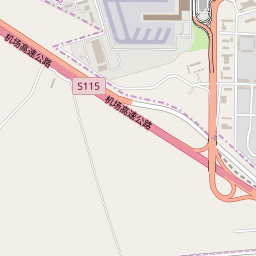

In [68]:
list(airfield_tiles_df['images'])[20]

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

In [ ]:
clf_fromfile = load('airfield_svm.joblib') 

In [65]:
def evaluate_image(image):
    image_pil = image
    image_np = np.array(image_pil)[...,:3]
    image_flat_vector = image_np.flatten()
    return clf_fromfile.predict([image_flat_vector])[0]

In [68]:
img = PIL.Image.open('./data/airfield/18_168455_103215.png')

In [69]:
evaluate_image(img)

1